In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')
import sys

In [18]:
log=pd.read_csv('C:/Users/hp/Downloads/Imarticus\Python/macintoshtwitter.csv')
consumerkey=log['key'][0]
consumersecret=log['key'][1]
accesstoken=log['key'][2]
accesstokensecret=log['key'][3]

In [19]:
## create authentication object
authenticate=tweepy.OAuthHandler(consumerkey,consumersecret)


In [20]:
## set access token and access token secret
authenticate.set_access_token(accesstoken, accesstokensecret)

In [21]:
## create API object while passing in auth information
api=tweepy.API(authenticate, wait_on_rate_limit=True)

In [27]:
## extract 100 tweeets from user account 
post=api.user_timeline(screen_name='NarendraModi',count=100 , lang='en'  ,tweet_mode='extended')

Unexpected parameter: lang


In [38]:
## print last 5 tweets from account
print('show 5 recent tweeets: \n')
i=1
for tweet in post[0:5]:
   
        print(str(i)+')'+tweet.full_text + '\n')
        i=i+1

show 5 recent tweeets: 

1)Well done Akash! Congratulations for the prestigious medal at the World Boxing Championships.

This success will motivate younger boxers to excel. Wishing you the very best for your future endeavours. https://t.co/AGD2OuGBzD

2)महाराष्ट्रात अहमदनगरमध्ये रुग्णालयाला लागलेल्या आगीत झालेल्या जीवितहानीबद्दल दुःख झाले आहे. पीडितांच्या कुटुंबियांकडे शोकभावना व्यक्त करतो. जखमींच्या तब्येतीत लवकर सुधारणा होऊ दे.

3)Anguished by the loss of lives due to a fire in a hospital in Ahmednagar, Maharashtra. Condolences to the bereaved families. May the injured recover at the earliest.

4)It was wonderful to meet Shri SC Jamir, the former CM of Nagaland and respected statesman. We exchanged views on several issues. I also have fond memories of working with him when he briefly served as the Governor of Gujarat back in 2009. https://t.co/bjYw877CPV

5)सभी देशवासियों को भाई दूज की ढेरों शुभकामनाएं। 
 
Best wishes to everyone on the auspicious occasion of Bhai Dooj.



In [63]:
## create dataframe with column name tweets
df=pd.DataFrame([tweet.full_text for tweet in post], columns=['Tweets'])
df.head()

,Tweets
0,Well done Akash! Congratulations for the prest...
1,महाराष्ट्रात अहमदनगरमध्ये रुग्णालयाला लागलेल्य...
2,Anguished by the loss of lives due to a fire i...
3,"It was wonderful to meet Shri SC Jamir, the fo..."
4,सभी देशवासियों को भाई दूज की ढेरों शुभकामनाएं।...


In [65]:
df['Tweets'][1]

'महाराष्ट्रात अहमदनगरमध्ये रुग्णालयाला लागलेल्या आगीत झालेल्या जीवितहानीबद्दल दुःख झाले आहे. पीडितांच्या कुटुंबियांकडे शोकभावना व्यक्त करतो. जखमींच्या तब्येतीत लवकर सुधारणा होऊ दे.'

In [47]:
## Clean up the text
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) ## removing @ mention
    text=re.sub(r'#','',text)             ## removing # symbol
    text=re.sub(r'RT[\s]+','',text)       ## removing RT followed by space
    text=re.sub(r'https?:\/\/\S+','',text) ## removing http and https 
    return text
df['Tweets']=df['Tweets'].apply(cleanTxt)   ## applying function
## clean Text
df

,Tweets
0,Well done Akash! Congratulations for the prest...
1,महाराष्ट्रात अहमदनगरमध्ये रुग्णालयाला लागलेल्य...
2,Anguished by the loss of lives due to a fire i...
3,"It was wonderful to meet Shri SC Jamir, the fo..."
4,सभी देशवासियों को भाई दूज की ढेरों शुभकामनाएं।...
...,...
95,"In Rome last evening, I had a great interactio..."
96,Well done Manipur! Keep up the good work of le...
97,Glad to have met PM Mario Draghi in Rome. We t...
98,C'è un potenziale immenso per incrementare le ...


In [48]:
## create function to subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

## create two new column
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

## show new Dataframe
df

,Tweets,Subjectivity,Polarity
0,Well done Akash! Congratulations for the prest...,0.128750,0.325000
1,महाराष्ट्रात अहमदनगरमध्ये रुग्णालयाला लागलेल्य...,0.000000,0.000000
2,Anguished by the loss of lives due to a fire i...,0.375000,-0.125000
3,"It was wonderful to meet Shri SC Jamir, the fo...",0.266667,0.200000
4,सभी देशवासियों को भाई दूज की ढेरों शुभकामनाएं।...,0.300000,1.000000
...,...,...,...
95,"In Rome last evening, I had a great interactio...",0.529167,0.475000
96,Well done Manipur! Keep up the good work of le...,0.550000,0.350000
97,Glad to have met PM Mario Draghi in Rome. We t...,0.568750,0.309375
98,C'è un potenziale immenso per incrementare le ...,0.000000,0.000000


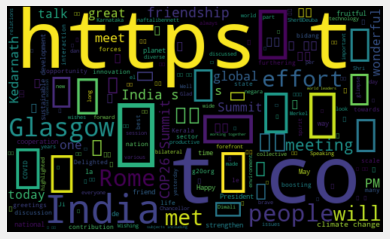

In [76]:
## plot word Cloud
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
## create function to compute positive, negative and neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Well done Akash! Congratulations for the prest...,0.128750,0.325000,Positive
1,महाराष्ट्रात अहमदनगरमध्ये रुग्णालयाला लागलेल्य...,0.000000,0.000000,Neutral
2,Anguished by the loss of lives due to a fire i...,0.375000,-0.125000,Negative
3,"It was wonderful to meet Shri SC Jamir, the fo...",0.266667,0.200000,Positive
4,सभी देशवासियों को भाई दूज की ढेरों शुभकामनाएं।...,0.300000,1.000000,Positive
...,...,...,...,...
95,"In Rome last evening, I had a great interactio...",0.529167,0.475000,Positive
96,Well done Manipur! Keep up the good work of le...,0.550000,0.350000,Positive
97,Glad to have met PM Mario Draghi in Rome. We t...,0.568750,0.309375,Positive
98,C'è un potenziale immenso per incrementare le ...,0.000000,0.000000,Neutral


In [51]:
## negative Tweets in dataframe
df2 = df.groupby('Analysis')
df2.get_group('Negative')

,Tweets,Subjectivity,Polarity,Analysis
2,Anguished by the loss of lives due to a fire i...,0.375,-0.125000,Negative
11,"A few years ago, Kedarnath witnessed a horrifi...",0.500,-0.366667,Negative
63,Kerala Piravi day greetings to the people of K...,0.450,-0.050000,Negative
69,Landed in Glasgow. Will be joining the Summit...,0.375,-0.125000,Negative
80,"Birthday wishes to my Ministerial colleague, S...",0.575,-0.025000,Negative
91,At the Summit in Rome with other world leaders.,0.375,-0.125000,Negative


In [52]:
## positive Tweets in Dataframe
df[df.Analysis=='Positive']   ## Another way indexing

,Tweets,Subjectivity,Polarity,Analysis
0,Well done Akash! Congratulations for the prest...,0.128750,0.325000,Positive
3,"It was wonderful to meet Shri SC Jamir, the fo...",0.266667,0.200000,Positive
4,सभी देशवासियों को भाई दूज की ढेरों शुभकामनाएं।...,0.300000,1.000000,Positive
5,No words are enough to do justice to the monum...,0.625000,0.400000,Positive
7,पवित्र तीर्थनगरी श्री केदारनाथ धाम को उसकी रुच...,0.444444,0.347222,Positive
14,"Thank you, my dear friend for the wonderful g...",1.000000,0.900000,Positive
18,Had the honour of meeting Baldev Singh Ji and ...,0.520000,0.130000,Positive
20,I feel privileged that I got to spend Diwali w...,1.000000,0.800000,Positive
21,With our brave troops in Nowshera.,1.000000,0.800000,Positive
22,दीपावली के पावन अवसर पर देशवासियों को हार्दिक ...,1.000000,1.000000,Positive


In [53]:
## print all positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       ## we want only rows
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1
    

1)Well done Akash! Congratulations for the prestigious medal at the World Boxing Championships.

This success will motivate younger boxers to excel. Wishing you the very best for your future endeavours. 

2)It was wonderful to meet Shri SC Jamir, the former CM of Nagaland and respected statesman. We exchanged views on several issues. I also have fond memories of working with him when he briefly served as the Governor of Gujarat back in 2009. 

3)सभी देशवासियों को भाई दूज की ढेरों शुभकामनाएं। 
 
Best wishes to everyone on the auspicious occasion of Bhai Dooj.

4)No words are enough to do justice to the monumental contribution of the great Adi Shankaracharya towards preserving our culture. In Kedarnath today, I had the honour of dedicating to the nation the Shri Adi Shankaracharya Samadhi. 

5)पवित्र तीर्थनगरी श्री केदारनाथ धाम को उसकी रुचि, प्रवृत्ति और प्रकृति के अनुरूप भव्य और दिव्य स्वरूप देने का प्रयास साकार होता दिख रहा है।

Making the divine Kedarnath even more vibrant and pilgrim

In [54]:
## print negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0]):       ## we want only rows
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)Anguished by the loss of lives due to a fire in a hospital in Ahmednagar, Maharashtra. Condolences to the bereaved families. May the injured recover at the earliest.

2)A few years ago, Kedarnath witnessed a horrific natural calamity. That time, questions were raised on whether Kedarnath can rise again or not?

Powered by a collective spirit, Kedarnath’s glory has been restored. 

3)Kerala Piravi day greetings to the people of Kerala. Kerala is widely admired for its picturesque surroundings and the industrious nature of its people. May the people of Kerala succeed in their various endeavours.

4)Landed in Glasgow. Will be joining the  Summit, where I look forward to working with other world leaders on mitigating climate change and articulating India’s efforts in this regard. 

5)Birthday wishes to my Ministerial colleague, Shri  Ji. He is spearheading India’s strides in achieving port-led development as well as boosting the shipping sector. He is also making efforts to popularise tr

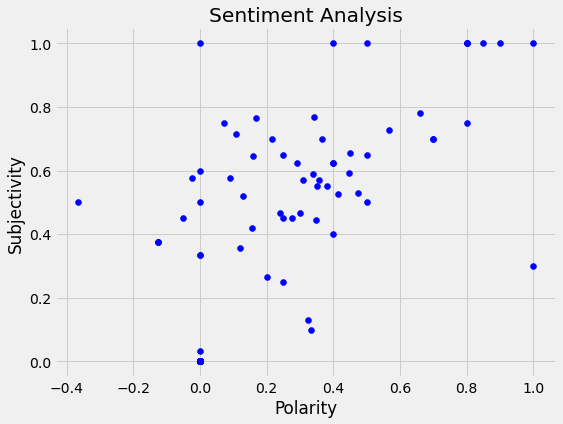

In [55]:
## plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [56]:
## get percentage og positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)

50.0

In [57]:
## get percentage og negative tweets
ntweets=df[df.Analysis=='Negative']

round((ntweets.shape[0]/df.shape[0])*100,1)

6.0

In [58]:
## show value counts
df['Analysis'].value_counts()

Positive    50
Neutral     44
Negative     6
Name: Analysis, dtype: int64

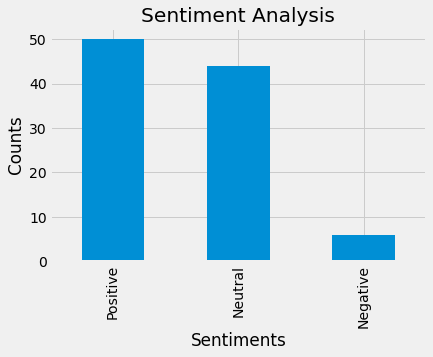

In [59]:
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()